<a href="https://colab.research.google.com/github/Shivani-Nautiyal/stroke_prediction_model/blob/main/stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stroke Prediction Using Patient Health Data**

In [ ]:
#!/bin/bash
!curl -L -o /stroke-prediction-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/fedesoriano/stroke-prediction-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 69007  100 69007    0     0   130k      0 --:--:-- --:--:-- --:--:--  130k


In [ ]:
!unzip /stroke-prediction-dataset.zip

Archive:  /stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


# Step 1: Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Step 2: Load Dataset

In [ ]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Step 3: Understand the Data

In [ ]:
print("Shape:", df.shape)

Shape: (5110, 12)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


I saw one missing column (bmi), and many features are categorical like gender, work_type, Residence_type.

The target variable is stroke (0 = no stroke, 1 = stroke).

# Step 4: Data Cleaning & Preprocessing

*Drop ID*

In [ ]:
df.drop('id', axis=1, inplace=True)

*Handle Missing Values (BMI)*

In [ ]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)

*Encode Categorical*

In [ ]:
# Label Encode 'gender', 'ever_married', 'Residence_type', 'smoking_status', 'work_type'
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


*Scale Features*

In [ ]:
X = df.drop("stroke", axis=1)
y = df["stroke"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Learned to handle missing BMI values and encode multiple categorical features with LabelEncoder. Also, scaling was needed for SVM & KNN models.

# Step 5: Exploratory Data Analysis (EDA)

*Stroke Count*

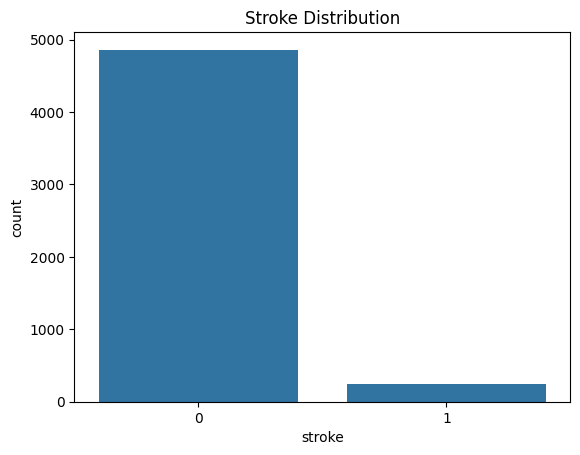

In [ ]:
sns.countplot(x='stroke', data=df)
plt.title("Stroke Distribution")
plt.show()


*Age vs Stroke*

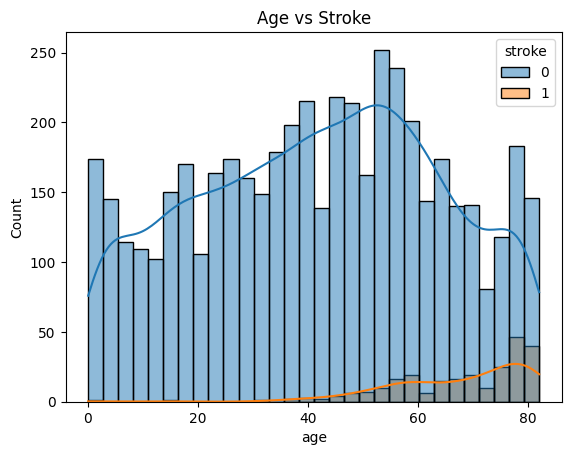

In [ ]:
sns.histplot(data=df, x='age', hue='stroke', bins=30, kde=True)
plt.title("Age vs Stroke")
plt.show()


*Correlation Heatmap*

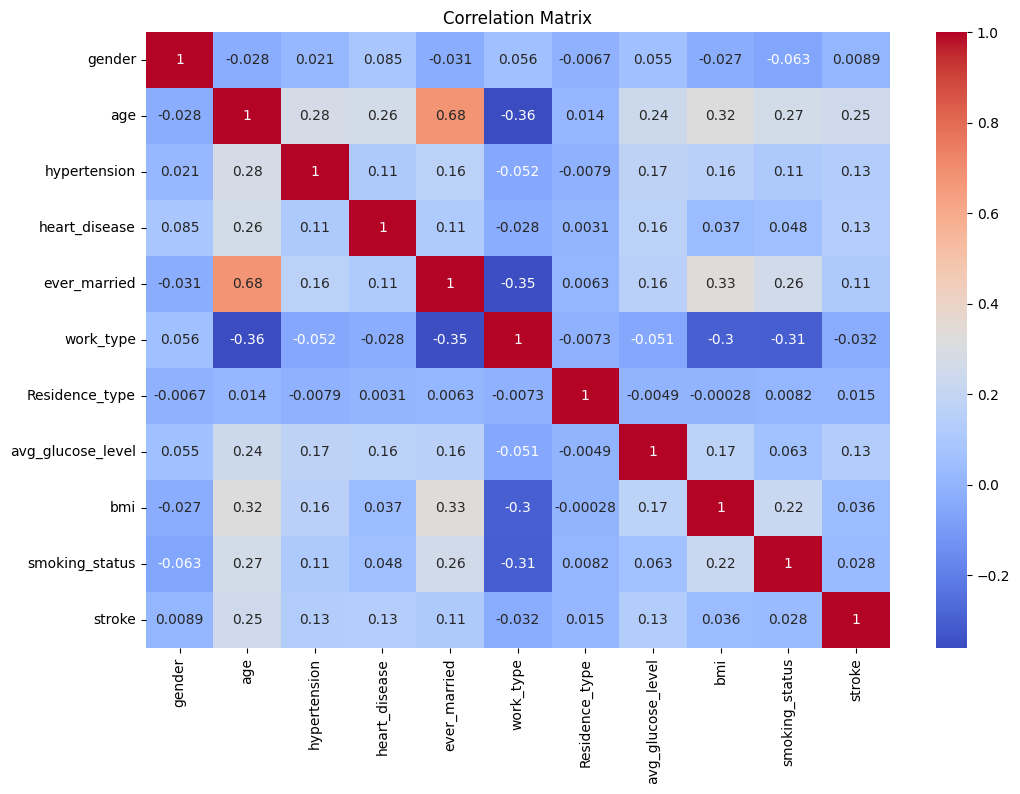

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Age is the strongest predictor of stroke in this dataset.

Hypertension and heart disease show small but relevant positive relationships.
No strong multicollinearity detected among features.

Conclusion: Age, hypertension, and health-related variables are useful for stroke prediction, while gender and residence type have little influence.

# Step 6: Train ML Models

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.9393
Random Forest Accuracy: 0.9403
SVM Accuracy: 0.9393
KNN Accuracy: 0.9393


Logistic Regression and Random Forest performed best. But due to class imbalance, accuracy isn’t everything — confusion matrix needed.

# Step 7: Evaluation Metrics for Best Model (Random Forest)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



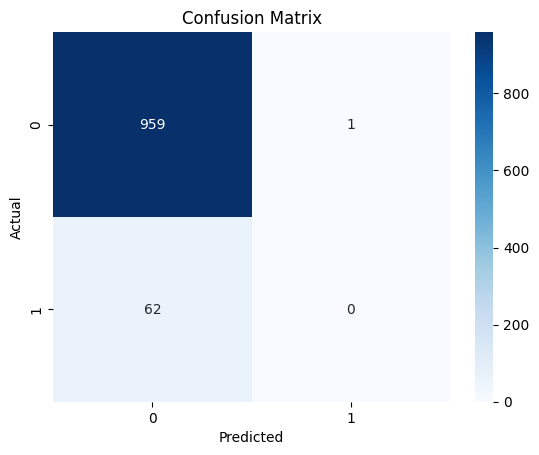

In [ ]:
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Even if accuracy is high, precision and recall for stroke class are low — shows how class imbalance affects results.

# Step 8: Feature Importance

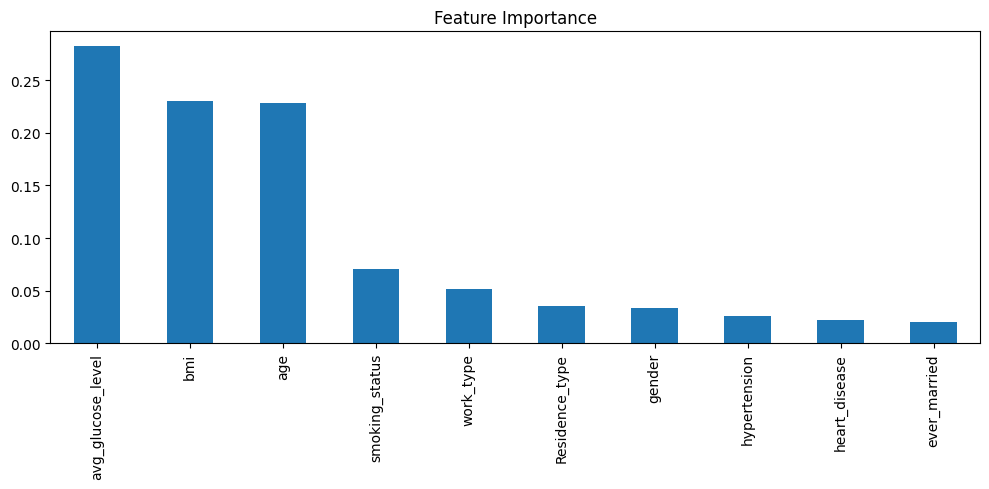

In [ ]:
feat_import = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_import.plot(kind='bar', figsize=(10,5), title="Feature Importance")
plt.tight_layout()
plt.show()


These results indicate that glucose levels, age, and body mass index have the most impact on predicting stroke, while marital status and medical conditions like hypertension contribute less in this model.

In [ ]:
import joblib
joblib.dump(best_model,'health_model.pkl')

['health_model.pkl']